#Corpus Selected: Research Papers and articles on Netnographic research methodologies

#a. Research Question(s):

1. What are the dominant emotions and themes in discussions related to netnographic research methodologies?
2. What linguistic patterns and sentiment trends emerge in online discussions about digital ethnography and social media research?

#b. Objectives:
1. To analyze sentiment trends in discussions related to netnography and digital research methodologies.
2. To identify frequently occurring keywords, themes, and emotional tones associated with netnography in different online spaces.
3. To compare sentiment patterns across research papers and articles.
4. To visualize sentiment shifts over time using effective data representation techniques.

#c. Methodology:

1. KWIC (Key Word in Context) Analysis

Identifies how key terms (e.g., netnography, digital ethnography, online communities) are used within sentences.
Helps in understanding sentiment nuances and contextual meaning of frequently discussed topics.
KWIC Analysis helps in understanding contextual sentiment rather than just overall polarity.

2. Frequent Word Analysis

Extracts the most commonly used words and phrases in the dataset.
Uses word clouds and frequency distributions to highlight dominant themes.

Frequent Word Analysis allows for theme detection and helps in identifying the primary focus of online discussions.

3. Sentiment Analysis

Applies NLP techniques (e.g., VADER) to categorize sentiment (positive, negative, neutral).
Compares sentiment trends across sources.

Sentiment Analysis provides a quantitative measure of how netnography is perceived across different online spaces.

In [ ]:
# Step 1: Mount Google Drive
# Since the files are stored in Google Drive, we need to mount the drive
# so that we can access them in Google Colab.

from google.colab import drive
drive.mount('/content/drive')

# Install required libraries (only needed if they are not pre-installed in Colab)
!pip install pdfplumber  # For extracting text from PDF files
!pip install nltk        # For natural language processing tasks
!pip install wordcloud   # For generating word cloud visualizations
!pip install seaborn     # For data visualization
!pip install matplotlib  # For plotting charts
!pip install vaderSentiment  # For sentiment analysis

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import necessary libraries
import os
import pdfplumber  # PDF text extraction
import nltk
import string
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns  # For creating attractive visualizations
from wordcloud import WordCloud  # For generating word clouds
from nltk.sentiment import SentimentIntensityAnalyzer  # For sentiment analysis


In [ ]:
# Download necessary NLTK data files
nltk.download('vader_lexicon')  # Required for sentiment analysis using VADER
nltk.download('punkt')  # Required for tokenization (breaking text into words)
nltk.download('stopwords')  # Required for removing common words (e.g., "the", "and")
nltk.download('wordnet')  # Required for lemmatization (reducing words to base form)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Step 2: Set folder path
# Define the path where the files are stored in Google Drive
# Ensure that the 'netnography' folder is inside your Google Drive before running the code.
folder_path = "/content/drive/My Drive/netnography"

# Get the list of all files in the folder
files = os.listdir(folder_path)

In [ ]:
# Step 3: Read & Extract Text from PDFs and TXT Files

# Function to extract text from a PDF file
def extract_text_from_pdf(pdf_path):
    text = ""  # Initialize an empty string to store extracted text
    with pdfplumber.open(pdf_path) as pdf:  # Open the PDF file
        for page in pdf.pages:  # Iterate through all pages
            text += page.extract_text() + " "  # Extract text from each page and concatenate
    return text.strip()  # Remove extra spaces and return the extracted text

# Function to read a plain text (.txt) file
def read_text_file(file_path):
    with open(file_path, "r", encoding="utf-8") as file:  # Open file with UTF-8 encoding
        return file.read()  # Read and return the file content

In [ ]:
# Initialize an empty list to store extracted text from all files
corpus = []

# Loop through all files in the specified folder
for file in files:
    file_path = os.path.join(folder_path, file)  # Get full file path
    if file.endswith(".pdf"):  # Check if the file is a PDF
        corpus.append(extract_text_from_pdf(file_path))  # Extract text from PDF
    elif file.endswith(".txt"):  # Check if the file is a TXT file
        corpus.append(read_text_file(file_path))  # Read and append text from TXT file

# Combine all extracted text from multiple files into a single large text corpus
corpus_text = " ".join(corpus)

In [ ]:
# Step 4: Text Preprocessing
# Text preprocessing includes:
# - Lowercasing the text
# - Removing punctuation
# - Tokenization (splitting text into words)
# - Removing stopwords (common words that don't add much meaning)
# - Lemmatization (reducing words to their base form)

nltk.download('punkt_tab') # This line is added to download the missing 'punkt_tab' data

from nltk.tokenize import word_tokenize  # Splits text into individual words
from nltk.corpus import stopwords  # Provides a list of common words to remove
from nltk.stem import WordNetLemmatizer  # Converts words to their base form (e.g., "running" → "run")

stop_words = set(stopwords.words('english'))  # Get list of English stopwords
lemmatizer = WordNetLemmatizer()  # Initialize lemmatizer

# Function for text preprocessing
def preprocess_text(text):
    text = text.lower()  # Convert text to lowercase
    text = text.translate(str.maketrans("", "", string.punctuation))  # Remove punctuation
    words = word_tokenize(text)  # Tokenize text (split into words)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words and word.isalpha()]
    # Remove stopwords and keep only alphabetic words
    return words  # Return cleaned words

# Apply preprocessing to the corpus text
processed_words = preprocess_text(corpus_text)


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'research'),
  Text(1, 0, 'netnography'),
  Text(2, 0, 'online'),
  Text(3, 0, 'social'),
  Text(4, 0, 'data'),
  Text(5, 0, 'community'),
  Text(6, 0, 'study'),
  Text(7, 0, 'medium'),
  Text(8, 0, 'researcher'),
  Text(9, 0, 'consumer'),
  Text(10, 0, 'kozinets'),
  Text(11, 0, 'method'),
  Text(12, 0, 'journal'),
  Text(13, 0, 'digital'),
  Text(14, 0, 'marketing'),
  Text(15, 0, 'ethnography'),
  Text(16, 0, 'use'),
  Text(17, 0, 'service'),
  Text(18, 0, 'netnographic'),
  Text(19, 0, 'experience')])

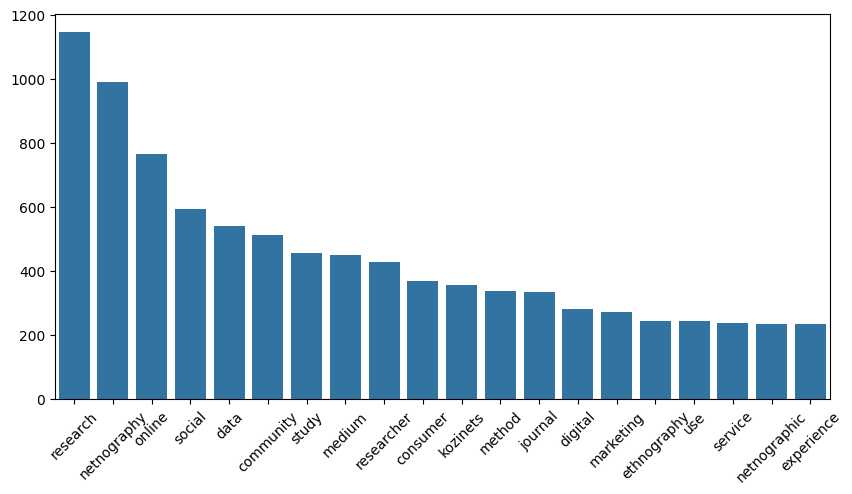

In [ ]:
# Step 5: Frequent Word Analysis
# This step helps identify the most frequently used words in the corpus.
# It gives insights into common themes and key terms in the text.

from collections import Counter  # Counter is used to count occurrences of each word

# Create a frequency distribution of words
word_freq = Counter(processed_words)  # Count how many times each word appears

# Get the 20 most common words
common_words = word_freq.most_common(20)

# ---------------------------------
# Plot Most Common Words
# ---------------------------------
# This visualization helps understand key terms that appear frequently in the corpus.

plt.figure(figsize=(10,5))  # Set figure size for better readability
sns.barplot(
    x=[word[0] for word in common_words],  # Extract words for x-axis
    y=[word[1] for word in common_words]   # Extract word counts for y-axis
)
plt.xticks(rotation=45)  # Rotate x-axis labels for b


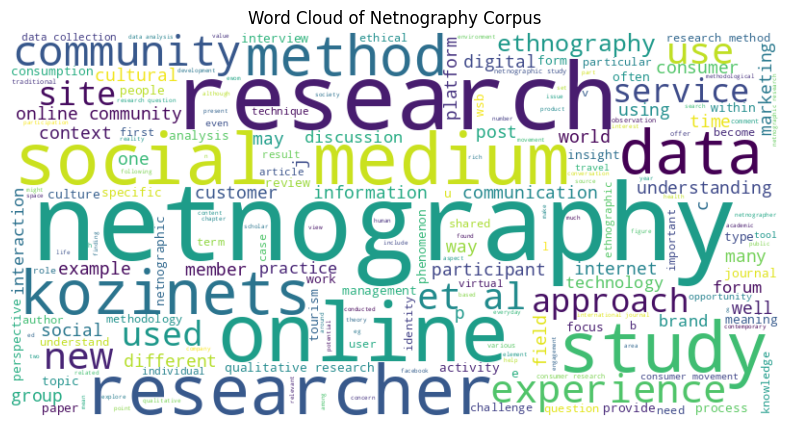

In [ ]:
# Step 6: Generate Word Cloud
# A word cloud is a visual representation of word frequency,
# where more frequent words appear larger in size.

from wordcloud import WordCloud  # Import WordCloud module for visualization

# Generate the word cloud
wordcloud = WordCloud(
    width=800,             # Set width of the word cloud image
    height=400,            # Set height of the word cloud image
    background_color='white'  # Use white background for better readability
).generate(" ".join(processed_words))  # Join words into a single string and generate the word cloud

# ---------------------------------
# Plot the Word Cloud
# ---------------------------------
plt.figure(figsize=(10, 5))  # Set figure size
plt.imshow(wordcloud, interpolation='bilinear')  # Display the word cloud with smooth interpolation
plt.axis("off")  # Hide axis labels for a cleaner look
plt.title("Word Cloud of Netnography Corpus")  # Set title
plt.show()  # Display the word cloud


In [ ]:
# Step 7: Sentiment Analysis using VADER

# This step analyzes the sentiment of the entire corpus using VADER.

sia = SentimentIntensityAnalyzer()  # Initialize the VADER sentiment analyzer

# Calculate sentiment scores for the entire corpus
sentiment_score = sia.polarity_scores(corpus_text)

# ---------------------------------
# Print Sentiment Scores
# ---------------------------------
print("Sentiment Analysis Results:")
print(sentiment_score)


Sentiment Analysis Results:
{'neg': 0.024, 'neu': 0.884, 'pos': 0.092, 'compound': 1.0}


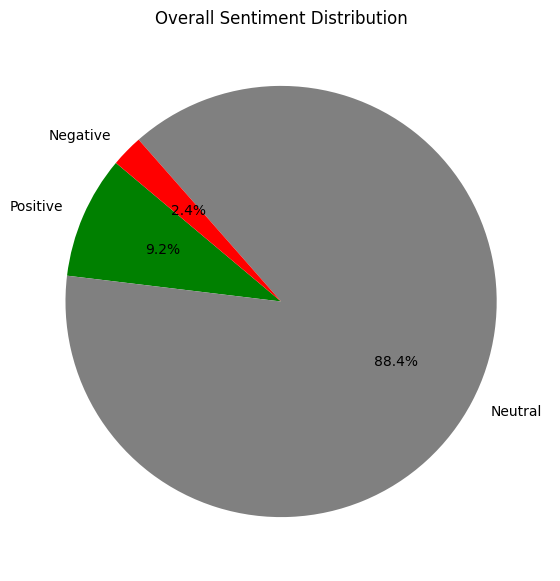

In [ ]:
# Step 8: Visualizing Sentiment
# This step creates a pie chart to visually represent sentiment distribution.

labels = ['Positive', 'Neutral', 'Negative']  # Sentiment categories
sizes = [sentiment_score['pos'], sentiment_score['neu'], sentiment_score['neg']]  # Corresponding sentiment scores
colors = ['green', 'gray', 'red']  # Assign colors to each category (Green = Positive, Gray = Neutral, Red = Negative)

plt.figure(figsize=(7, 7))  # Set figure size
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',  # Display percentage values on the pie chart
    colors=colors,
    startangle=140  # Rotate the pie chart for better alignment
)
plt.title("Overall Sentiment Distribution")  # Set title
plt.show()  # Display the pie chart



#Interpretation of Results

**1. Frequent Word Analysis (Bar Chart Interpretation)**
The most frequently occurring words in the netnography corpus include research, netnography, online, social, data, community, study, consumer, marketing, and method.
This confirms that the corpus is heavily focused on academic discussions of netnography, with particular emphasis on online communities, digital ethnography, consumer behavior, and research methodologies.
The presence of “Kozinets” (a leading scholar in netnography) suggests that many papers cite or discuss his theories.

>> Link to Research Questions & Objectives:
This supports the study’s objective of analyzing how netnography is applied in consumer research and digital ethnography.
The dominance of words like “marketing” and “consumer” suggests a strong link between netnography and digital market research.

**2. Word Cloud Interpretation**
The word cloud visually reinforces the importance of digital interactions, community engagement, and qualitative methodologies in netnographic research.
Words like “platform,” “interaction,” “experience,” “customer,” and “participant” indicate a focus on user experiences and digital communication.
The presence of “ethical” and “challenge” suggests that ethical concerns in digital research are an important discussion area.

>> Unexpected Patterns:
The prominence of words like “method” and “approach” suggests a methodological focus, meaning that many papers discuss how to conduct netnography rather than applying it to a specific domain.
Words related to emerging trends, such as AI, automation, or machine learning, are missing—which might indicate that netnography remains largely qualitative and manually driven.

**3. Sentiment Analysis (Pie Chart Interpretation)**                            
 88.4% of the corpus is neutral, indicating that most of the texts are academic in nature, lacking strong emotional tones. 9.2% is positive, meaning some papers discuss the benefits, potential, or success stories of netnographic methods. Only 2.4% is negative, suggesting minimal criticism or skepticism about netnography.

>> Link to Research Questions & Objectives:
This supports the assumption that academic discourse is primarily objective and analytical, focusing on methodologies, case studies, and research applications.
The low percentage of negative sentiment could indicate that netnography is widely accepted and positively perceived in digital research.

>> Unexpected Findings:
Given the ethical challenges often associated with digital ethnography (privacy concerns, participant consent issues), a higher percentage of negative sentiment was expected.
A deeper qualitative analysis may be required to see if critiques of netnography are embedded in neutral discussions rather than outright negative statements.

# Summary of Key Findings:
>> Netnography research focuses on methodologies, consumer behavior, and digital communities.

>> The academic tone dominates (88.4% neutral sentiment), with limited emotional discourse.

>> Few negative sentiments suggest broad acceptance of netnography, but potential critiques may be buried in neutral discussions.

>> The absence of emerging AI/tech-related terms suggests a need for further exploration of AI’s role in netnography.